## Setup

In [99]:
import sys, phate, itertools, torch
sys.path.append('/home/aarthivenkat/AAnet/')
from AAnet_torch import *
from torch import nn, optim
import matplotlib
import seaborn as sns

In [100]:
from PCHA import PCHA
import javadi
import spams
import numpy as np
import pickle as pkl
import graphtools as gt
import matplotlib.pyplot as plt
import scprep, scipy
from sklearn.metrics import mean_squared_error
from scipy.stats import spearmanr, linregress
from sklearn.decomposition import PCA, NMF
from sklearn.metrics import mean_squared_error
from scipy.spatial.distance import pdist, squareform

## Load Simulated Data and reduce dimensionality to visualize nonlinearity

In [101]:
data = data.StereoSphereProjection(n_components=3, simplex_radius=2, n_obs=2000)
sim_data = data.data
vertices = data.vertices

In [84]:
phate_op = phate.PHATE(random_state=0, n_components=3, knn=10)
data_phate = phate_op.fit_transform(sim_data)
vertices_phate = phate_op.transform(vertices)

Calculating PHATE...
  Running PHATE on 2000 observations and 4 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.05 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.06 seconds.
  Calculating optimal t...
    Automatically selected t = 30
  Calculated optimal t in 1.83 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.46 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.26 seconds.
Calculated PHATE in 7.63 seconds.
Calculating KNN search...
Calculating affinities...


/home/aarthivenkat/.local/lib/python3.8/site-packages/phate/phate.py:898: RuntimeWarning: Pre-fit PHATE should not be used to transform a new data matrix. Please fit PHATE to the new data by running 'fit' with the new data.
  warnings.warn(


## Result is a Simplex with curved edges. This nonlinearity in the simplex makes it hard for archetypal analysis methods to identify the correct archetypes (colored in red)

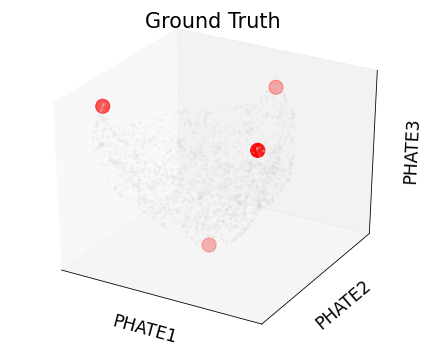

In [102]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
scprep.plot.scatter3d(data_phate, ax=ax, label_prefix='PHATE', alpha=0.1, title='Ground Truth',
                    azim=90, c='lightgray', fontsize=12, colorbar=False, ticks=None)
scprep.plot.scatter3d(vertices_phate,
                    c='red', ax=ax, s=200)
plt.tight_layout()

## PCHA

In [103]:
pcha_ats_runs = {}

In [104]:
for i in range(5):
    XC, S, C, SSE, varexpl = PCHA(sim_data.T, noc=4)
    pcha_ats = XC.T
    pcha_ats_runs[i] = pcha_ats

Calculating KNN search...
Calculating affinities...
Calculating KNN search...
Calculating affinities...
Calculating KNN search...
Calculating affinities...
Calculating KNN search...
Calculating affinities...
Calculating KNN search...
Calculating affinities...


/home/aarthivenkat/.local/lib/python3.8/site-packages/phate/phate.py:898: RuntimeWarning: Pre-fit PHATE should not be used to transform a new data matrix. Please fit PHATE to the new data by running 'fit' with the new data.
  warnings.warn(
/home/aarthivenkat/.local/lib/python3.8/site-packages/phate/phate.py:898: RuntimeWarning: Pre-fit PHATE should not be used to transform a new data matrix. Please fit PHATE to the new data by running 'fit' with the new data.
  warnings.warn(
/home/aarthivenkat/.local/lib/python3.8/site-packages/phate/phate.py:898: RuntimeWarning: Pre-fit PHATE should not be used to transform a new data matrix. Please fit PHATE to the new data by running 'fit' with the new data.
  warnings.warn(
/home/aarthivenkat/.local/lib/python3.8/site-packages/phate/phate.py:898: RuntimeWarning: Pre-fit PHATE should not be used to transform a new data matrix. Please fit PHATE to the new data by running 'fit' with the new data.
  warnings.warn(
/home/aarthivenkat/.local/lib/python

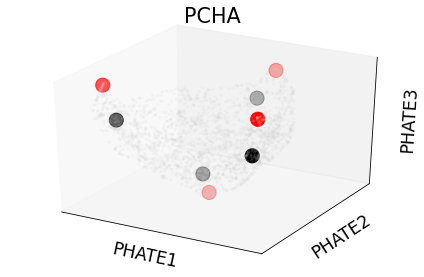

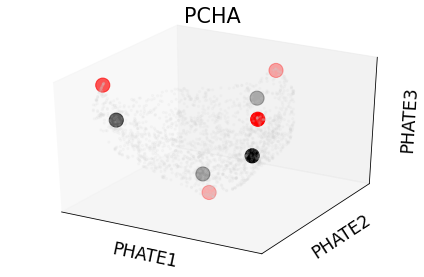

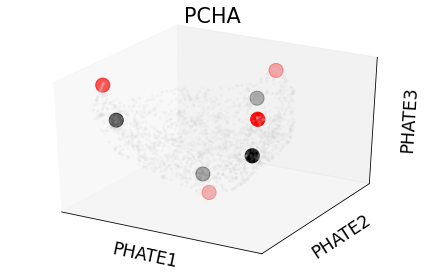

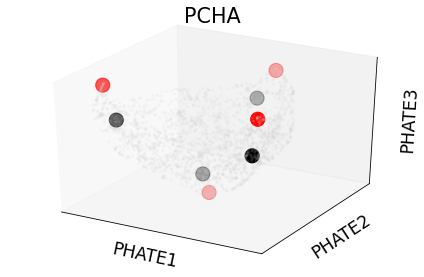

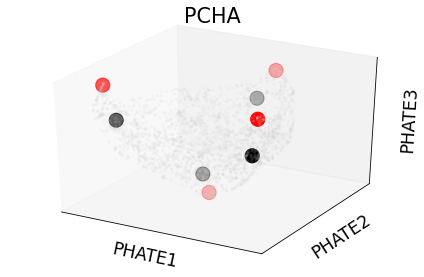

In [105]:
for i in range(5):
    pcha_ats = pcha_ats_runs[i]
    pcha_ats_phate = phate_op.transform(pcha_ats)
    pcha_ats_phate_inverted = pcha_ats_phate.copy()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scprep.plot.scatter3d(data_phate, ax=ax, label_prefix='PHATE', alpha=0.1, title='PCHA',
                        azim=90, c='lightgray', fontsize=12, colorbar=False, ticks=None)
    scprep.plot.scatter3d(vertices_phate,
                        c='red', ax=ax, s=200)
    scprep.plot.scatter3d(pcha_ats_phate_inverted,
                        c='black', ax=ax, s=200)

    ax.xaxis.labelpad = 0; ax.yaxis.labelpad = 0; ax.zaxis.labelpad = 0
    plt.tight_layout()
    

## Kernel PCHA

In [106]:
kpcha_ats_runs = {}

In [107]:
D = scipy.spatial.distance.pdist(sim_data)
D = scipy.spatial.distance.squareform(D)
sigma = np.std(D)
K = sim_data @ sim_data.T

In [108]:
for i in range(5):
    _, new_archetypal_coords, C, _, _ = PCHA(K, noc=4)
    XC = np.array(sim_data.T @ C).T
    kpcha_ats = XC.T
    kpcha_ats_runs[i] = kpcha_ats

Calculating KNN search...
Calculating affinities...
Calculating KNN search...
Calculating affinities...
Calculating KNN search...
Calculating affinities...
Calculating KNN search...
Calculating affinities...
Calculating KNN search...
Calculating affinities...


/home/aarthivenkat/.local/lib/python3.8/site-packages/phate/phate.py:898: RuntimeWarning: Pre-fit PHATE should not be used to transform a new data matrix. Please fit PHATE to the new data by running 'fit' with the new data.
  warnings.warn(
/home/aarthivenkat/.local/lib/python3.8/site-packages/phate/phate.py:898: RuntimeWarning: Pre-fit PHATE should not be used to transform a new data matrix. Please fit PHATE to the new data by running 'fit' with the new data.
  warnings.warn(
/home/aarthivenkat/.local/lib/python3.8/site-packages/phate/phate.py:898: RuntimeWarning: Pre-fit PHATE should not be used to transform a new data matrix. Please fit PHATE to the new data by running 'fit' with the new data.
  warnings.warn(
/home/aarthivenkat/.local/lib/python3.8/site-packages/phate/phate.py:898: RuntimeWarning: Pre-fit PHATE should not be used to transform a new data matrix. Please fit PHATE to the new data by running 'fit' with the new data.
  warnings.warn(
/home/aarthivenkat/.local/lib/python

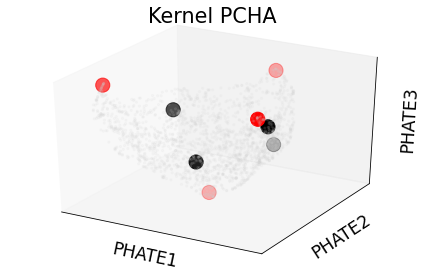

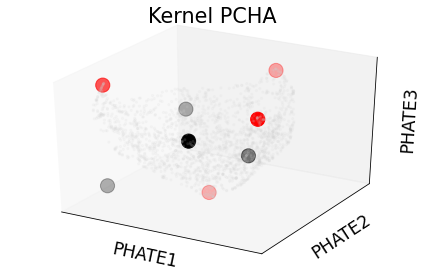

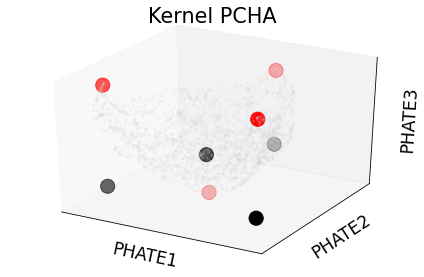

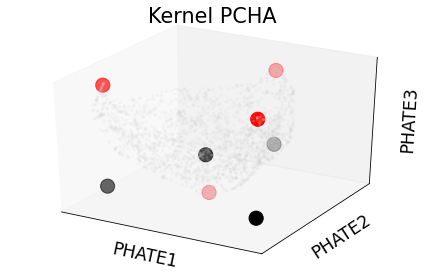

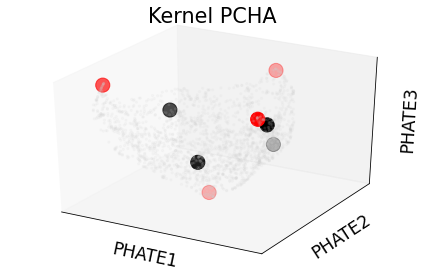

In [109]:
for i in range(5):
    kpcha_ats = kpcha_ats_runs[i]
    kpcha_ats_phate = phate_op.transform(kpcha_ats)
    kpcha_ats_phate_inverted = kpcha_ats_phate.copy()
    kpcha_ats_phate_inverted[:,2] = -1 * kpcha_ats_phate[:,2]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scprep.plot.scatter3d(data_phate, ax=ax, label_prefix='PHATE', alpha=0.1, title='Kernel PCHA',
                        azim=90, c='lightgray', fontsize=12, colorbar=False, ticks=None)
    scprep.plot.scatter3d(vertices_phate,
                        c='red', ax=ax, s=200)
    scprep.plot.scatter3d(kpcha_ats_phate_inverted,
                        c='black', ax=ax, s=200)

    ax.xaxis.labelpad = 0; ax.yaxis.labelpad = 0; ax.zaxis.labelpad = 0
    plt.tight_layout()

## Javadi et al

In [110]:
javadi_ats_runs = {}

In [111]:
for i in range(5):
    new_archetypal_coords, javadi_ats, _, _ = javadi.acc_palm_nmf(sim_data,
                                            r=4, maxiter=25, plotloss=False,
                                            ploterror=False)
    javadi_ats_runs[i] = javadi_ats

Calculating KNN search...
Calculating affinities...
Calculating KNN search...
Calculating affinities...
Calculating KNN search...
Calculating affinities...
Calculating KNN search...
Calculating affinities...
Calculating KNN search...
Calculating affinities...


/home/aarthivenkat/.local/lib/python3.8/site-packages/phate/phate.py:898: RuntimeWarning: Pre-fit PHATE should not be used to transform a new data matrix. Please fit PHATE to the new data by running 'fit' with the new data.
  warnings.warn(
/home/aarthivenkat/.local/lib/python3.8/site-packages/phate/phate.py:898: RuntimeWarning: Pre-fit PHATE should not be used to transform a new data matrix. Please fit PHATE to the new data by running 'fit' with the new data.
  warnings.warn(
/home/aarthivenkat/.local/lib/python3.8/site-packages/phate/phate.py:898: RuntimeWarning: Pre-fit PHATE should not be used to transform a new data matrix. Please fit PHATE to the new data by running 'fit' with the new data.
  warnings.warn(
/home/aarthivenkat/.local/lib/python3.8/site-packages/phate/phate.py:898: RuntimeWarning: Pre-fit PHATE should not be used to transform a new data matrix. Please fit PHATE to the new data by running 'fit' with the new data.
  warnings.warn(
/home/aarthivenkat/.local/lib/python

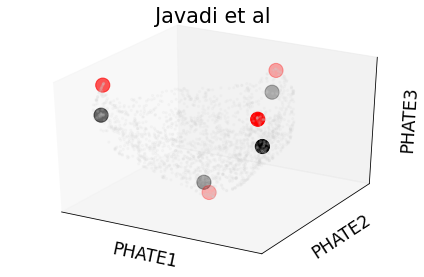

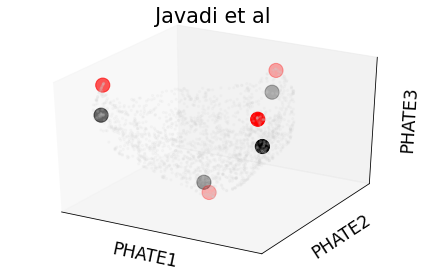

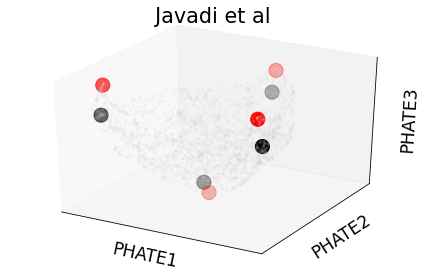

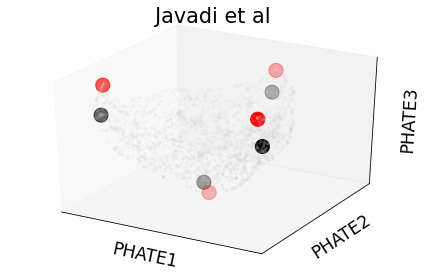

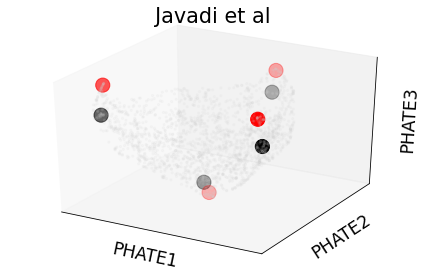

In [112]:
for i in range(5):
    javadi_ats = javadi_ats_runs[i]
    javadi_ats_phate = phate_op.transform(javadi_ats)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scprep.plot.scatter3d(data_phate, ax=ax, label_prefix='PHATE', alpha=0.1, title='Javadi et al',
                        azim=90, c='lightgray', fontsize=12, colorbar=False, ticks=None)
    scprep.plot.scatter3d(vertices_phate,
                        c='red', ax=ax, s=200)
    scprep.plot.scatter3d(javadi_ats_phate,
                        c='black', ax=ax, s=200)

    ax.xaxis.labelpad = 0; ax.yaxis.labelpad = 0; ax.zaxis.labelpad = 0
    plt.tight_layout()

## Chen et al

In [113]:
chen_ats_runs = {}

In [114]:
for i in range(5):
    chen_ats, new_archetypal_coords, _ = spams.archetypalAnalysis(
                        np.asfortranarray(sim_data.T), p=4, returnAB=True, numThreads=-1)

    chen_ats = chen_ats.T
    chen_ats_runs[i] = chen_ats

Calculating KNN search...
Calculating affinities...
Calculating KNN search...
Calculating affinities...
Calculating KNN search...
Calculating affinities...
Calculating KNN search...
Calculating affinities...
Calculating KNN search...
Calculating affinities...


/home/aarthivenkat/.local/lib/python3.8/site-packages/phate/phate.py:898: RuntimeWarning: Pre-fit PHATE should not be used to transform a new data matrix. Please fit PHATE to the new data by running 'fit' with the new data.
  warnings.warn(
/home/aarthivenkat/.local/lib/python3.8/site-packages/phate/phate.py:898: RuntimeWarning: Pre-fit PHATE should not be used to transform a new data matrix. Please fit PHATE to the new data by running 'fit' with the new data.
  warnings.warn(
/home/aarthivenkat/.local/lib/python3.8/site-packages/phate/phate.py:898: RuntimeWarning: Pre-fit PHATE should not be used to transform a new data matrix. Please fit PHATE to the new data by running 'fit' with the new data.
  warnings.warn(
/home/aarthivenkat/.local/lib/python3.8/site-packages/phate/phate.py:898: RuntimeWarning: Pre-fit PHATE should not be used to transform a new data matrix. Please fit PHATE to the new data by running 'fit' with the new data.
  warnings.warn(
/home/aarthivenkat/.local/lib/python

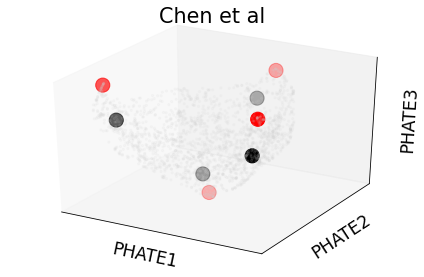

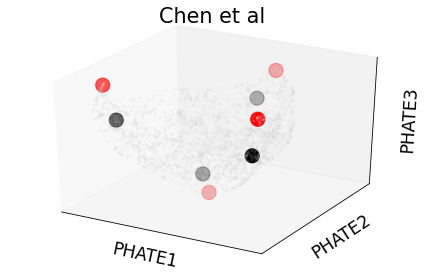

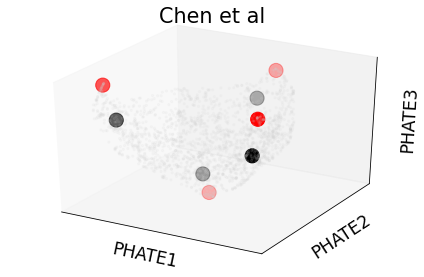

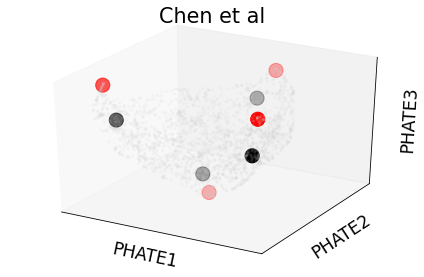

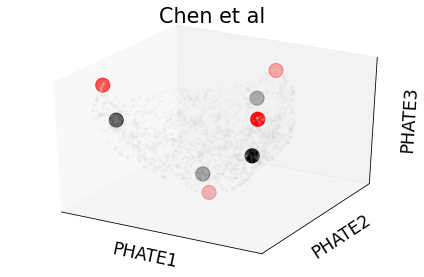

In [115]:
for i in range(5):
    chen_ats = chen_ats_runs[i] 
    chen_ats_phate = phate_op.transform(chen_ats)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scprep.plot.scatter3d(data_phate, ax=ax, label_prefix='PHATE', alpha=0.1, title='Chen et al',
                        azim=90, c='lightgray', fontsize=12, colorbar=False, ticks=None)
    scprep.plot.scatter3d(vertices_phate,
                        c='red', ax=ax, s=200)
    scprep.plot.scatter3d(chen_ats_phate,
                        c='black', ax=ax, s=200)

    ax.xaxis.labelpad = 0; ax.yaxis.labelpad = 0; ax.zaxis.labelpad = 0
    plt.tight_layout()